In [116]:
import numpy as np
from scipy import fft
from math import *
import random
from matplotlib import pyplot as plt

In [117]:
def gauss(x, A, sigma):
    return A * np.exp(-(x ** 2) / (sigma ** 2))

In [118]:
def impulse_noise(size, N, mult):
    step = floor(size / N)
    y = np.zeros(size)
    for i in range(0, floor(N / 2)):
        y[round(size / 2) + i * step] = mult * (0.5 + random.random())
        y[round(size / 2) - i * step] = mult * (0.5 + random.random())
    return y

In [119]:
def own_wiener(x, n):
    return 1 - (n / x) ** 2

In [120]:
A = 1.0
sigma = 0.5

In [121]:
mult = 5
step = 0.005

t = np.arange(-mult, mult, step)

In [122]:
x0 = gauss(t, A, sigma)

In [123]:
NA = 0
NS = 0.05
n1 = np.random.normal(NA, NS, len(x0)) # normrnd(NA,NS,[1 length(x0)]); 
x1 = x0 + n1

In [124]:
count = 20
M = 0.4
n2 = impulse_noise(len(x0),count,M);
x2 = x0 + n2

In [125]:
y1 = own_wiener(fft.fft(x1), fft.fft(n1))
y2 = own_wiener(fft.fft(x2), fft.fft(n2))

c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


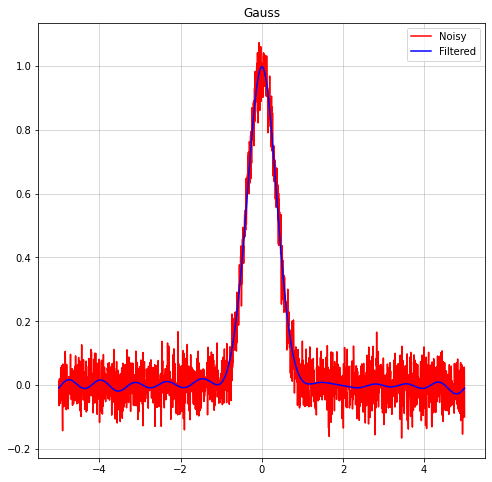

In [126]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Gauss')
plt.plot(t, x1, color='r', label='Noisy')
plt.plot(t, fft.ifft(fft.fft(x1) * y1), color='b', label='Filtered')
plt.legend()

c:\users\андрей\appdata\local\programs\python\python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


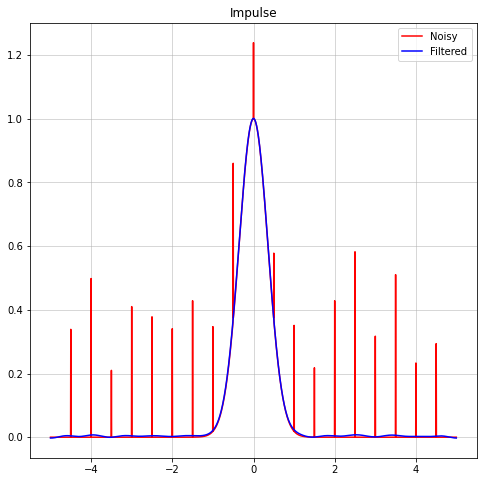

In [127]:
figure, ax = plt.subplots(figsize=(8, 8))
ax.grid(linewidth=0.5)
plt.title('Impulse')
plt.plot(t, x2, color='r', label='Noisy')
plt.plot(t, fft.ifft(fft.fft(x2) * y2), color='b', label='Filtered')
plt.legend()